<a href="https://colab.research.google.com/github/aungmyohtet07/Cat-Dog_Classification/blob/master/Cat%26Dog_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dogs | Cats Classification

## Modules

In [0]:
import torch
import torch.nn as nn
import torchvision as tv
import collections
import matplotlib.pyplot as plt
import time


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls

'My Drive'


## Data Import

In [0]:
train_trans = tv.transforms.Compose([tv.transforms.RandomRotation(30), tv.transforms.CenterCrop(224), tv.transforms.ToTensor(), 
                                                                          tv.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
#transfrom should be in order
test_trans = tv.transforms.Compose([tv.transforms.Resize(255), tv.transforms.CenterCrop(224), tv.transforms.ToTensor(),
                                                                          tv.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

trainset = tv.datasets.ImageFolder('/content/gdrive/My Drive/dogs-vs-cats/training_set', transform = train_trans) #-->1016
testset = tv.datasets.ImageFolder('/content/gdrive/My Drive/dogs-vs-cats/test_set', transform = test_trans) #-->2000

batchSize = 30

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batchSize, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=20, shuffle=True)

## Visualize Data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Class:0')

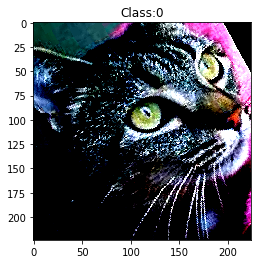

In [0]:
im , lab  = next(iter(trainloader))
# lab - dog -->1, cat-->0
# im is torch.Tensor --> torch.Tensor.permute

# visualizing an image from first batch 
idx = 19
plt.imshow(im[idx].permute(1,2,0).numpy(), cmap='gray')
plt.title('Class:'+str(lab[idx].numpy()))

## CNN Model

In [0]:
# Denset is used for RGB imgs
net = tv.models.densenet121(pretrained=True)

for param in net.parameters(): ## .parameters() is an iterator for the parameters in torch.nn.Parameters()
    param.requires_grad = False
    
# help(nn.Sequential)
my_classifier = nn.Sequential(collections.OrderedDict([
                                                    ('fc1',nn.Linear(1024,500)), 
                                                    ('relu', nn.ReLU()),
                                                    ('fc2', nn.Linear(500,2)),
                                                    ('output', nn.LogSoftmax(dim=1))]))
# my_classifier = nn.Linear(in_features=1024, out_features=2, bias = True) --> does not work
net.classifier = my_classifier

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/checkpoints/densenet121-a639ec97.pth
100%|██████████| 32342954/32342954 [00:00<00:00, 81562232.69it/s]


In [0]:
net

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

## Training Process

In [0]:
training_device = torch.device('cuda')
net.to(training_device)

criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

epoch = 15
running_loss = 0.0
step = 0

for i in range(epoch):
        for data in trainloader:
            
            image, label = data
            
            image, label = image.to(training_device), label.to(training_device)
            
            optimizer.zero_grad()
            
            pcs = net.forward(image)
            
            loss = criterion(pcs, label)
            
            loss.backward() # gradients are computed
            
            optimizer.step() # parameters are upgraded
            
            running_loss += loss.item()
            step += 1
            if step % 4 == 0:
                print("Epoch: {}  | Avg Loss:{}".format(i+1, running_loss/(4*batchSize)))
                running_loss = 0.0

print('Finish Training!')

Epoch: 1  | Avg Loss:0.024078491578499474
Epoch: 1  | Avg Loss:0.016334667056798934
Epoch: 1  | Avg Loss:0.011397722860177357
Epoch: 1  | Avg Loss:0.008182623609900474
Epoch: 1  | Avg Loss:0.004599990819891294
Epoch: 1  | Avg Loss:0.007079662134250005
Epoch: 1  | Avg Loss:0.0042368659749627115
Epoch: 1  | Avg Loss:0.005081825020412604
Epoch: 2  | Avg Loss:0.009650301188230515
Epoch: 2  | Avg Loss:0.011529755219817162
Epoch: 2  | Avg Loss:0.005174617127825816
Epoch: 2  | Avg Loss:0.011449072447915872
Epoch: 2  | Avg Loss:0.013135536511739095
Epoch: 2  | Avg Loss:0.004075523838400841
Epoch: 2  | Avg Loss:0.010147860397895177
Epoch: 2  | Avg Loss:0.006065959359208743
Epoch: 2  | Avg Loss:0.009022123459726573
Epoch: 3  | Avg Loss:0.0061879198377331095
Epoch: 3  | Avg Loss:0.006771366794904073
Epoch: 3  | Avg Loss:0.0026490612576405208
Epoch: 3  | Avg Loss:0.0031713746798535188
Epoch: 3  | Avg Loss:0.003713024128228426
Epoch: 3  | Avg Loss:0.004118786286562681
Epoch: 3  | Avg Loss:0.0036254

In [0]:
torch.save(net.state_dict, '/content/gdrive/My Drive/dot_cat.pt')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[0.8718, 0.1282]], device='cuda:0')

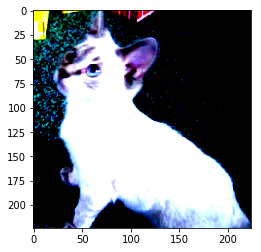

In [0]:
img, lab = next(iter(testloader))
an_image = img[2].unsqueeze(0).to(training_device)
net.eval()
with torch.no_grad():
    pcs = torch.exp(net(an_image))
toshow = img[2].permute(1,2,0).numpy()
plt.imshow(toshow)
pcs